# Clustering data

Let's have a look at some numeric data we can cluster. First, we generate data:

       var1      var2
0 -5.094102  4.863336
1  5.434666  5.106170
2  5.462461  4.260063
3  3.736881  5.354560
4 -4.962616  5.189325


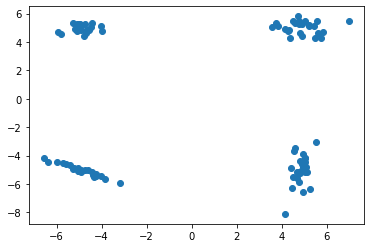

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(5)

data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=4,
                          n_clusters_per_class=1, class_sep=5.0, shuffle=True, random_state=6)

X = pd.DataFrame(data = data[0], columns = ['var1','var2'])
print(X.head())

plt.scatter(X['var1'], X['var2'])
plt.show()

In [2]:
data

(array([[-5.09410244,  4.86333632],
        [ 5.43466624,  5.10616961],
        [ 5.46246094,  4.26006308],
        [ 3.7368807 ,  5.35455971],
        [-4.96261596,  5.18932548],
        [ 4.81354012,  4.64833891],
        [ 4.76767008,  5.28514094],
        [ 5.03343726, -4.16564495],
        [ 4.93757183, -3.91852153],
        [-4.71305444,  4.77660765],
        [-4.00996756,  5.08594209],
        [-4.99331571, -5.05882231],
        [-5.19386849,  4.91411934],
        [-4.63478116,  4.80447408],
        [ 4.44283553, -6.30400405],
        [-4.74138916, -5.00141504],
        [-6.38548573, -4.43128727],
        [-4.23319745, -5.46557562],
        [ 4.76483506,  5.50007605],
        [ 4.8243683 , -4.40744045],
        [-4.40673063, -5.3686445 ],
        [ 5.63431327,  4.65759563],
        [-5.71703136, -4.50217617],
        [-4.99090695,  5.28455108],
        [-4.89901166, -5.0618314 ],
        [ 5.09288136, -4.8274979 ],
        [ 5.1987837 ,  5.13633976],
        [-5.81594117,  4.561

# Using k-means

Clustering them is straightforward with scikit-learn:

In [6]:
from sklearn.cluster import KMeans

k_m = KMeans(n_clusters = 5, init='random')

k_m.fit_predict(X)

print(k_m.labels_)
print(k_m.cluster_centers_)

[1 0 0 0 1 0 0 3 3 1 1 4 1 1 3 4 4 2 0 3 2 0 4 1 4 3 0 1 3 0 2 3 0 0 4 1 3
 4 1 0 1 1 2 1 4 3 0 0 2 0 1 4 1 0 4 2 0 1 3 1 3 0 3 2 3 3 0 0 4 1 3 3 3 1
 4 1 0 4 0 0 3 4 3 1 3 3 1 1 2 3 3 3 1 2 4 0 4 3 0 1]
[[ 4.89304848  5.03066823]
 [-4.89499814  4.97538489]
 [-4.14665233 -5.42689086]
 [ 4.84004257 -5.02599692]
 [-5.35862153 -4.81059846]]


Let's now visualise the clusters along the dimensions of these two variables:

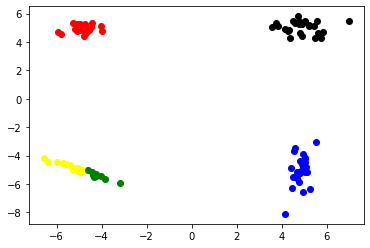

In [13]:
colours = {0:'black',1:'red',2:'green',3:'blue',4:'yellow'}

for (index,obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.show()    

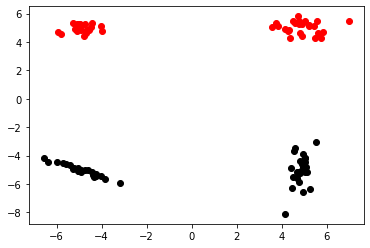

In [14]:
k_m = KMeans(n_clusters = 2, init='random')
k_m.fit_predict(X)
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.show()

# A different dataset

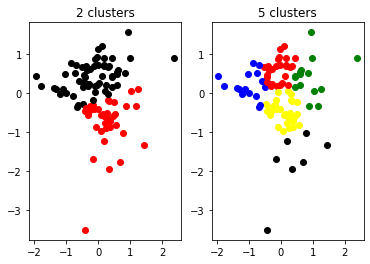

In [15]:
data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=4,
                          n_clusters_per_class=1, class_sep=0.4, shuffle=True, random_state=6)

X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

plt.subplot(1, 2, 1)
k_m = KMeans(n_clusters = 2, init='random')
k_m.fit_predict(X)
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.title('2 clusters')

plt.subplot(1, 2, 2)
k_m = KMeans(n_clusters = 5, init='random')
k_m.fit_predict(X)
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.title('5 clusters')
plt.show()

# Determining the number of clusters

sum of squared errors (SSE) can be used to plot the decrease over the number of clusters to see whether there is still extra error reduction by introducing more clusters:

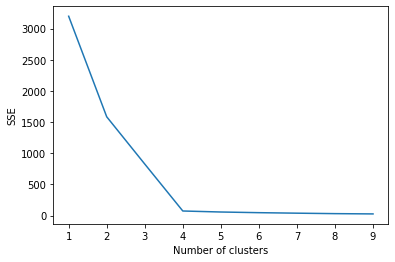

In [20]:
data = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,n_repeated=0, n_classes=4,
                          n_clusters_per_class=1, class_sep=4, shuffle=True, random_state=6)
X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=20).fit(X)
    
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

There is a clear point in the curve where it starts to flatten. Finding this point is called the elbow method.

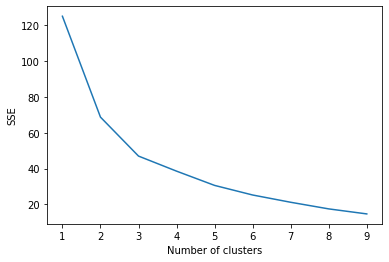

In [21]:
data = make_classification(n_samples=100, n_features=2, 
                              n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                              n_clusters_per_class=1, 
                              class_sep=0.4, shuffle=True, random_state=6)
X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=20).fit(X)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In this case, with only two generated clusters (```n_classes = 2```), there is a less pronounced elbow point, as the separation (```class_sep```) is low.

# Visualisation

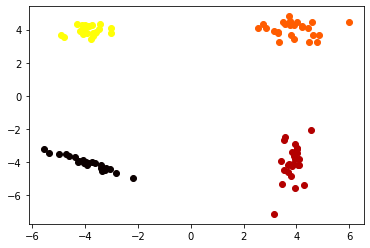

In [35]:
import matplotlib as mpl
import matplotlib.cm as cm

data = make_classification(n_samples=100, n_features=2,
                          n_informative=2, n_redundant=0, n_repeated=0, n_classes=4,n_clusters_per_class=1,class_sep=4, shuffle=True, random_state=6)

X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

# 4-means clustering
no_clusters = 4
k_m = KMeans(n_clusters = no_clusters, init='random')
k_m.fit_predict(X)

# We normalize the range of our labels so they are mapped to colour codes
norm = mpl.colors.Normalize(vmin=0, vmax= no_clusters)

# We import a colour map, in this case with 'hot'/reddish colours
cmap = cm.hot

# This object allows us to map our normalised values along the colour map
m = cm.ScalarMappable(norm=norm, cmap=cmap)

# Now, we can apply the same loop, but using the ScalarMappable object:
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = m.to_rgba(label))
plt.show()

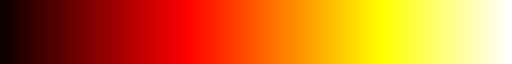

In [32]:
cmap